In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import pickle
import shap
from sklearn.inspection import PartialDependenceDisplay

In [91]:
# Reading in data
delays = pd.read_csv('train_data.csv')
delays = delays.dropna()
delays = pd.get_dummies(delays)
delays = delays.drop(['PREVIOUS_AIRPORT_William B. Heilig Field', 'PREVIOUS_AIRPORT_Abilene Regional',
                     'PREVIOUS_AIRPORT_Canyonlands Field', 'PREVIOUS_AIRPORT_General Brees Field',
                     'PREVIOUS_AIRPORT_General Lyman Field', 'PREVIOUS_AIRPORT_Grand Island Air Park',
                     'PREVIOUS_AIRPORT_Lake Charles Regional','PREVIOUS_AIRPORT_Laredo AFB',
                     'PREVIOUS_AIRPORT_Pellston Regional Airport of Emmet County',
                     'PREVIOUS_AIRPORT_Ponce Airport','PREVIOUS_AIRPORT_Ramey AFB',
                     'PREVIOUS_AIRPORT_Robert Gray AAF', 'PREVIOUS_AIRPORT_San Angelo Regional/Mathis Field',
                     'PREVIOUS_AIRPORT_Tweed New Haven', 'PREVIOUS_AIRPORT_Vernal Regional',
                     'PREVIOUS_AIRPORT_Waco Regional'], axis =1)
delays.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Wilkes Barre Scranton International,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby,PREVIOUS_AIRPORT_Williston Basin International,PREVIOUS_AIRPORT_Wilmington International,PREVIOUS_AIRPORT_Yampa Valley,PREVIOUS_AIRPORT_Yellowstone,PREVIOUS_AIRPORT_Yellowstone Regional,PREVIOUS_AIRPORT_Yuma MCAS/Yuma International
0,3,4,0,2,8,21,90,11965,24032,2709,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,2,6,44,180,10714,67273,4431,...,0,0,0,0,0,0,0,0,0,0
2,9,1,1,3,8,92,50,28583,26473,5552,...,0,0,0,0,0,0,0,0,0,0
3,5,3,0,3,3,72,129,34238,85579,21264,...,0,0,0,0,0,0,0,0,0,0
4,6,7,0,2,1,56,173,28904,53737,6864,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y = delays['DEP_DEL15']
X = delays.loc[:,'MONTH':'PREVIOUS_AIRPORT_Yuma MCAS/Yuma International']
X = X.drop('DEP_DEL15', axis=1)

###  Prepare the data:

In [93]:
# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=307)

In [64]:
# Create a processing pipeline using that fills missing values and transforms the predictors to the same scale
#pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
#   ('scaler', StandardScaler())])

In [65]:
# Creating a subset of the training data with 1000-2000 rows for tuning
#X_train_sub,_, y_train_sub,_ = train_test_split(X_train, y_train, train_size=2000, random_state=307)

### Build Random Forest Classifier

In [94]:
# Define and fit the random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=307)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=307)

In [95]:
# Serialize the trained model into a Pickle file
with open('my_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [96]:
# Evaluate the model
train_score = rf.score(X_train, y_train)
print(f"Train Accuracy: {train_score:f}")

test_score = rf.score(X_test, y_test)
print(f"Test Accuracy: {test_score:f}")

Train Accuracy: 0.812639
Test Accuracy: 0.812714


### Importing and cleaning new dataset 

In [97]:
new_data = pd.read_csv('new_data.csv')
new_data = new_data.dropna()
new_data = pd.get_dummies(new_data)
new_data = new_data.drop(['PREVIOUS_AIRPORT_Pueblo Memorial',
                      'PREVIOUS_AIRPORT_Sheppard AFB/Wichita Falls Municipal'], axis =1)
#new_data.head()

In [98]:
### Building predictions
pred = rf.predict(new_data)

In [99]:
new_data['Predictions'] = pred
new_data

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,PREVIOUS_AIRPORT_Wilkes Barre Scranton International,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby,PREVIOUS_AIRPORT_Williston Basin International,PREVIOUS_AIRPORT_Wilmington International,PREVIOUS_AIRPORT_Yampa Valley,PREVIOUS_AIRPORT_Yellowstone,PREVIOUS_AIRPORT_Yellowstone Regional,PREVIOUS_AIRPORT_Yuma MCAS/Yuma International,Predictions
0,6,7,4,3,36,173,18543,53737,2442,2780593,...,0,0,0,0,0,0,0,0,0,0
1,3,2,3,5,27,76,14450,26929,2864,1208249,...,0,0,0,0,0,0,0,0,0,0
2,1,3,7,2,32,216,17725,46218,2105,2780593,...,0,0,0,0,0,0,0,0,0,0
3,4,2,6,1,21,182,12902,16316,345,1581456,...,0,0,0,0,0,0,0,0,0,0
4,7,4,6,4,32,160,13900,79247,2009,1208249,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316555,8,4,1,2,79,50,29971,74087,5732,3103410,...,0,0,0,0,0,0,0,0,0,0
316556,8,1,11,2,36,159,19609,25270,596,2780593,...,0,0,0,0,0,0,0,0,0,0
316557,9,1,2,3,68,76,28583,27183,1209,3103410,...,0,0,0,0,0,0,0,0,0,0
316558,8,3,4,3,36,199,10253,91062,4404,1065782,...,0,0,0,0,0,0,0,0,0,0


In [100]:
pred

array([0, 0, 0, ..., 0, 0, 0])

#### Determining which predictors are significant 

In [101]:
# Get the feature importances
feature_importances = rf.feature_importances_

In [102]:
# Sort the features by importance
sorted_idx = feature_importances.argsort()[-20:]

In [103]:
# Print the names and importance scores of the top 20 features
for i in sorted_idx:
    print(new_data.columns[i], feature_importances[i])

AVG_MONTHLY_PASS_AIRPORT 0.015056609028008674
LONGITUDE 0.016138579648167596
DEPARTING_AIRPORT_Chicago O'Hare International 0.016286654435147284
DEP_TIME_BLK_1800-1859 0.016943933185417603
AVG_MONTHLY_PASS_AIRLINE 0.01783797275259968
DEP_TIME_BLK_2300-2359 0.01792714813474969
DEP_TIME_BLK_1900-1959 0.021105942671633914
AIRLINE_AIRPORT_FLIGHTS_MONTH 0.023204013880081663
DEP_TIME_BLK_0700-0759 0.02370145129032462
AIRPORT_FLIGHTS_MONTH 0.027492806380382782
AIRLINE_FLIGHTS_MONTH 0.027989217081423302
PREVIOUS_AIRPORT_NONE 0.029879255421700626
DEP_TIME_BLK_0800-0859 0.03355860160596062
TMAX 0.03482282871052254
DEP_TIME_BLK_0600-0659 0.03638819970402235
AWND 0.03836067147523528
MONTH 0.038829902204488474
SNOW 0.05412858371235282
SEGMENT_NUMBER 0.11027343997348732
PRCP 0.12541596784552506


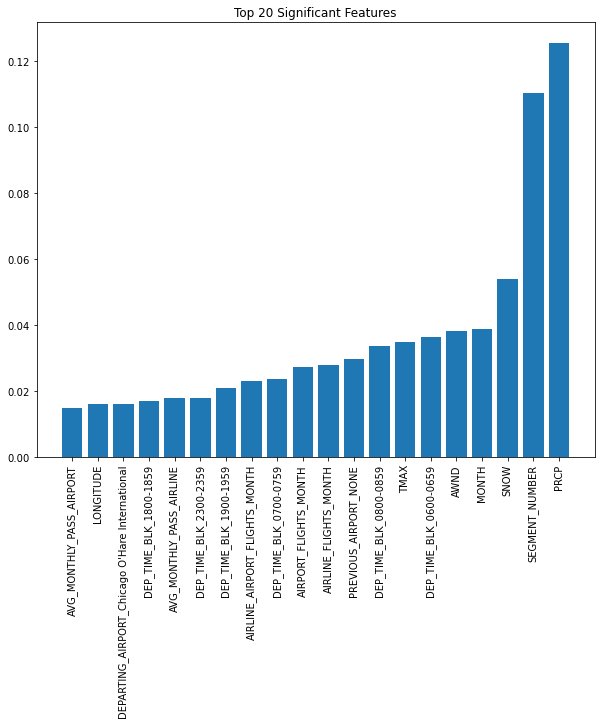

In [105]:
plt.figure(figsize=(10,8))
plt.title("Top 20 Significant Features")
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), new_data.columns[sorted_idx], rotation=90)
plt.show()

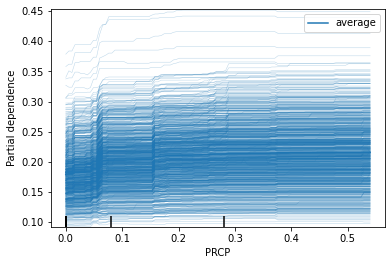

In [107]:
feature = ['PRCP']
PartialDependenceDisplay.from_estimator(rf, X_train_sub, feature, kind='both')

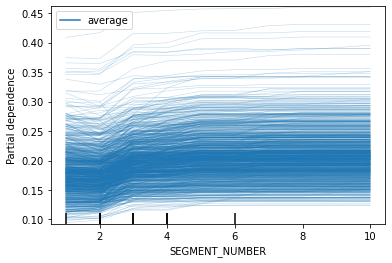

In [115]:
feature = ['SEGMENT_NUMBER']
display = PartialDependenceDisplay.from_estimator(rf, X_train_sub, feature, kind='both')

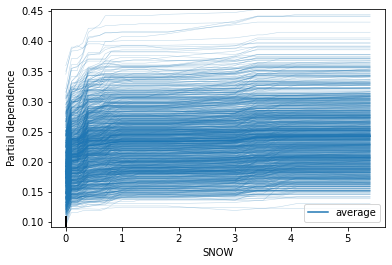

In [116]:
feature = ['SNOW']
PartialDependenceDisplay.from_estimator(rf, X_train_sub, feature, kind='both')

In [114]:
predictions['predictions'].value_counts()

0    316550
1        10
Name: predictions, dtype: int64

In [110]:
predictions = pd.DataFrame()

In [111]:
predictions['predictions'] = pred

In [112]:
predictions.to_csv('predictions.csv', index = False)